<a href="https://www.kaggle.com/code/yehoryevtushenko/lesson08-04-2024-hw?scriptVersionId=172089406" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import ConcatDataset
device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
import os
from PIL import Image
data_dir='/kaggle/input/fruit-recognition/train/train'
class ImageDataset(torch.utils.data.Dataset):
    """
    Custom Dataset for loading and preprocessing images.
    """
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.classes = os.listdir(root_dir)
        self.image_paths = self.get_pathes(root_dir)
        self.class_to_idx = {label: i for i, label in enumerate(self.classes)}

        if transform is None:
            self.transform = transforms.Compose([transforms.ToTensor()])
        else:
            self.transform = transform

    def get_pathes(self, root):
        image_paths = []
        labels = os.listdir(root)

        for label in labels:
            images = os.listdir(os.path.join(root, label))    
            image_paths.extend([os.path.join(root, label, image) for image in images])
        return image_paths

    def __len__(self):
        """
        Returns the number of images in the dataset.
        """
        return len(self.image_paths)

    def __getitem__(self, idx):
        """
        Loads and preprocesses an image at a given index.

        Args:
          idx (int): Index of the image to return.

        Returns:
          tuple: A tuple containing the preprocessed image and its label (if available).
        """
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')  # Assuming RGB images
        if self.transform:
            image = self.transform(image)

        # Add logic to load labels if available (modify based on your data structure)
        label_name = os.path.normpath(image_path).split(os.path.sep)[-2]

        return image, self.class_to_idx[label_name]

In [3]:
custom_train_data = ImageDataset(data_dir)

In [4]:
import torch
from torch.utils.data import random_split

total_size = len(custom_train_data)
train_size = int(0.8 * total_size)
test_size = total_size - train_size

train_dataset, test_dataset = random_split(custom_train_data, [train_size, test_size])

In [5]:
print(len(train_dataset))
print(len(test_dataset))

13483
3371


In [6]:
train_transform = transforms.Compose([
    transforms.Resize((100, 100)), # Зміна розміру зображення до 256x256 пікселів
    transforms.RandomHorizontalFlip(p=5), # Випадково перевернути по горизонталі з ймовірністю 50%
    transforms.ToTensor(), # Перетворити зображення у тензори PyTorch
])

test_transform = transforms.Compose([
    transforms.Resize((100, 100)), # Зміна розміру зображення до 256x256 пікселів
    transforms.ToTensor(), # Перетворити зображення у тензори PyTorch
])

train_dataset.transform = train_transform
test_dataset.transform = test_transform

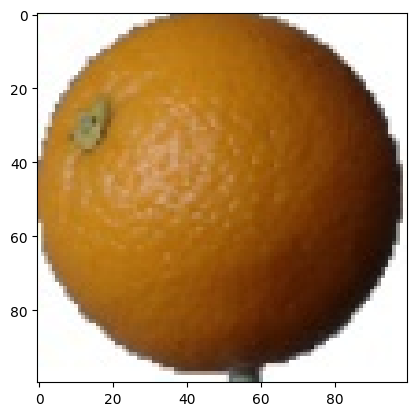

In [7]:
import matplotlib.pyplot as plt

img, label = custom_train_data[0]

# Отримайте дані зображення (тензор) і конвертуйте їх назад у масив NumPy
img = img.numpy()

# Перетворення каналів кольору
img = img.transpose((1, 2, 0))

plt.imshow(img)
plt.show()

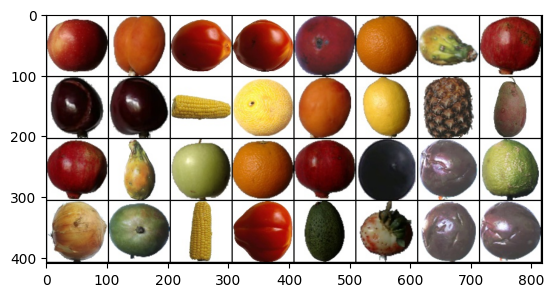

In [8]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=32)

batch, labels = next(iter(loader))

grid = make_grid(batch).permute(1, 2, 0) # результатом є тензор

plt.imshow(grid)